# Prédiction de la note des vins

Le notebook compare plusieurs de modèles de régression.

In [1]:
%matplotlib inline

In [2]:
from papierstat.datasets import load_wines_dataset
df = load_wines_dataset()
X = df.drop(['quality', 'color'], axis=1)
y = yn = df['quality']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

On normalise les données.

In [4]:
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
X_norm = normalize(X)

Cette façon de faire est complètement erronnée car il est peu probable que la même normalisation soit apppliquée sur les trois bases. La normalisation doit être estimée sur la base d'apprentissage et appliquée sur la base de test. Reprenons.

In [5]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_norm = norm.transform(X)

On récupère beaucoup de modèles implémentés dans *scikit-learn* pour la régression.

In [6]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.neural_network import *

models = [model for name, model in globals().items() if \
            hasattr(model, 'fit') and \
            not hasattr(model, 'predict_proba') and \
            hasattr(model, '__name__') and \
            not model.__name__.endswith('CV') and \
            'Logistic' not in model.__name__ and \
            'Regr' in model.__name__]

import pprint
pprint.pprint(models)

[<class 'sklearn.linear_model.bayes.ARDRegression'>,
 <class 'sklearn.linear_model.huber.HuberRegressor'>,
 <class 'sklearn.linear_model.base.LinearRegression'>,
 <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'>,
 <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'>,
 <class 'sklearn.linear_model.theil_sen.TheilSenRegressor'>,
 <class 'sklearn.linear_model.ransac.RANSACRegressor'>,
 <class 'sklearn.ensemble.forest.RandomForestRegressor'>,
 <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>,
 <class 'sklearn.ensemble.bagging.BaggingRegressor'>,
 <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>,
 <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>,
 <class 'sklearn.neighbors.regression.KNeighborsRegressor'>,
 <class 'sklearn.neighbors.regression.RadiusNeighborsRegressor'>,
 <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>]


In [7]:
from sklearn.metrics import r2_score

def score_model(xtr, xte, ytr, yte, model):
    try:
        model.fit(xtr, ytr)
    except Exception as e:
        raise Exception("Issue with model '{0}'".format(model.__name__)) from e
    return r2_score(yte, model.predict(xte))

In [8]:
from time import clock
r2s = []
names = []
durations = []
regressors = {}
for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression'}:
        continue
    begin = clock()
    reg = model()
    r2 = score_model(X_train_norm, X_test_norm, y_train, y_test, reg)
    duree = clock() - begin
    r2s.append(r2)
    names.append(model.__name__)
    durations.append(duree)
    regressors[model.__name__] = reg
    print(i, model.__name__, r2, duree)

1 HuberRegressor 0.14656698124989853 0.08469185346194978
2 LinearRegression 0.16412104835288344 0.002143212416646806
3 PassiveAggressiveRegressor -1.004728023622428 0.0038980786940192025
4 SGDRegressor 0.008565676883245832 0.003731362447046846


c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


5 TheilSenRegressor -0.31985992855027456 1.9941001411557229
6 RANSACRegressor -0.22175301996856067 0.05690554892509514
7 RandomForestRegressor 0.4234931663158962 0.35231133113441704
8 ExtraTreesRegressor 0.43014364682911976 0.10943499389826439
9 BaggingRegressor 0.43104191495296296 0.347188954693082
10 GradientBoostingRegressor 0.31537613599588465 0.3879680647522741
11 AdaBoostRegressor 0.20640291088635454 0.3836184299675218
12 KNeighborsRegressor 0.18704262494611645 0.02366659595053333
13 RadiusNeighborsRegressor 3.521544876450289e-05 0.3814748224886788
14 MLPRegressor 0.14146082168565133 1.8700427101740766


In [9]:
import pandas
df = pandas.DataFrame(dict(model=names, r2=r2s, duree=durations))
df = df[['model', 'r2', 'duree']]
df.sort_values('r2')

,model,r2,duree
2,PassiveAggressiveRegressor,-1.004728,0.003898
4,TheilSenRegressor,-0.319860,1.994100
5,RANSACRegressor,-0.221753,0.056906
12,RadiusNeighborsRegressor,0.000035,0.381475
3,SGDRegressor,0.008566,0.003731
13,MLPRegressor,0.141461,1.870043
0,HuberRegressor,0.146567,0.084692
1,LinearRegression,0.164121,0.002143
11,KNeighborsRegressor,0.187043,0.023667
10,AdaBoostRegressor,0.206403,0.383618


On filtre les valeurs inférieures à -1.

In [10]:
df = df[df.r2 >= -1]

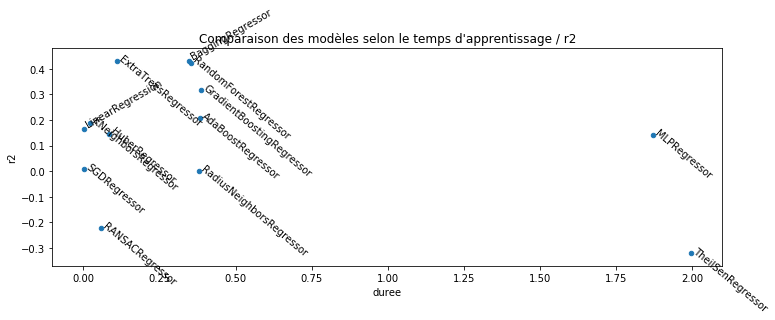

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
df.plot(x='duree', y='r2', kind="scatter", ax=ax)
for row in df.itertuples():
    t, y, x = row[1:4]
    if t[0] in {'B', 'L'}:
        ax.text(x, y, t, rotation=30, ha='left', va='bottom')
    else:
        ax.text(x, y, t, rotation=-40)
ax.set_title("Comparaison des modèles selon le temps d'apprentissage / r2");

L'estimateur [RANSACRegressor](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py) produit un $R^2$ très négatif. Regardons plus en détail.

In [12]:
pred = regressors['RANSACRegressor'].predict(X_test_norm)

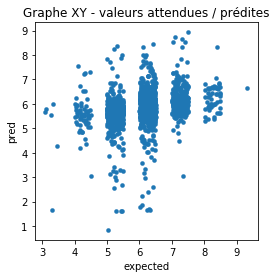

In [13]:
import numpy.random
df = pandas.DataFrame(dict(pred=pred, expected=y_test))
df['expected'] += numpy.random.random(df.shape[0]) * 0.5
ax = df.plot(x="expected", y="pred", kind='scatter', figsize=(4, 4), linewidths=0.1)
ax.set_title('Graphe XY - valeurs attendues / prédites');

Essayons de voir avec la densité.

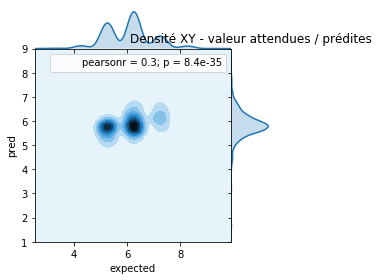

In [14]:
import seaborn
ax = seaborn.jointplot(df["expected"], df["pred"], kind="kde", size=4, space=0, ylim=(1, 9))
ax.ax_marg_y.set_title('Densité XY - valeur attendues / prédites');

Pas facile à voir. Essayons de voir autrement en triant les prédictions et les valeurs attendues par ordre.

In [15]:
sv = df.sort_values(['expected', 'pred']).reset_index(drop=True)

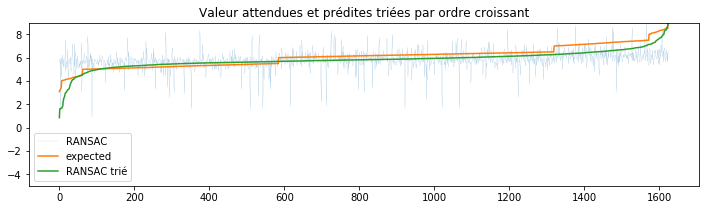

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(sv["pred"], label="RANSAC", lw=0.1)
ax.plot(list(sorted(df["expected"])), label="expected")
ax.plot(list(sorted(df["pred"])), label="RANSAC trié")
ax.set_ylim([-5, 9])
ax.set_title('Valeur attendues et prédites triées par ordre croissant')
ax.legend();

Agité le modèle.

In [17]:
regressors['RANSACRegressor'].estimator_.intercept_

-2.0777559557054293

Pour s'assurer que les résultats sont fiables, il faut recommencer avec une validation croisée.

In [18]:
import numpy.random
rnd = numpy.random.permutation(range(X_norm.shape[0]))
xns = X_norm[rnd, :]
yns = yn[rnd]
xns.shape, yns.shape

((6497, 11), (6497,))

In [19]:
from sklearn.model_selection import cross_val_score

def score_model_cross(xn, yn, model):
    res = cross_val_score(model, xn, yn, cv=5)
    return res.mean(), min(res), max(res)

score_model_cross(xns, yns, LinearRegression())

(0.18059080087978505, 0.14943699600199822, 0.20712085693256357)

In [20]:
r2s = []
mis = []
mas = []
names = []
durations = []
regressors = {}
for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression'}:
        continue
    begin = clock()
    reg = model()
    r2, mi, ma = score_model_cross(xns, yns, reg)
    duree = clock() - begin
    r2s.append(r2)
    mis.append(mi)
    mas.append(ma)
    names.append(model.__name__)
    durations.append(duree)
    regressors[model.__name__] = reg
    print(i, model.__name__, r2, mi, ma, duree)

1 HuberRegressor 0.16244383826585349 0.13941921072554164 0.18477412948442384 0.378024349263427
2 LinearRegression 0.18059080087978505 0.14943699600199822 0.20712085693256357 0.011812754741043818
3 PassiveAggressiveRegressor -1.1685590244013526 -2.621189652336712 0.0512078641735364 0.019420467461294777
4 SGDRegressor 0.005003447211072531 -0.0013201319482738505 0.01228011376823479 0.023456027799735324


c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\sit

5 TheilSenRegressor -0.3213788931436328 -0.4862639896823353 -0.0878598247360518 9.878548399267238
6 RANSACRegressor -2.972272881573781 -5.112553230154873 -1.5449879571035599 0.2745275352425125
7 RandomForestRegressor 0.43494336107002596 0.4220149689777958 0.44692455760518335 1.8247286811599182
8 ExtraTreesRegressor 0.4660279787562045 0.42415929006899833 0.4895917940795602 0.5765620660488686
9 BaggingRegressor 0.4330818104264081 0.4008220530917519 0.45152218461049154 1.7840728305060694
10 GradientBoostingRegressor 0.32882163034092926 0.30696680278348676 0.34981485878396446 2.005328598907969
11 AdaBoostRegressor 0.20341021818287536 0.1976696792897208 0.21280329202902848 1.8018127033829572
12 KNeighborsRegressor 0.15798648467075505 0.12911375487201104 0.18434632073971424 0.10060653899046557
13 RadiusNeighborsRegressor -0.0005526867332620311 -0.0008835168146388295 0.00011235062226389037 1.497617577423302


c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


14 MLPRegressor 0.18021371349603071 0.1566408658906141 0.19876371284038075 12.489354456518864


c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
df = pandas.DataFrame(dict(model=names, r2=r2s, min=mis, max=mas, duree=durations))
df = df[['model', 'r2', 'min', 'max', 'duree']]
df.sort_values('r2')

,model,r2,min,max,duree
5,RANSACRegressor,-2.972273,-5.112553,-1.544988,0.274528
2,PassiveAggressiveRegressor,-1.168559,-2.621190,0.051208,0.019420
4,TheilSenRegressor,-0.321379,-0.486264,-0.087860,9.878548
12,RadiusNeighborsRegressor,-0.000553,-0.000884,0.000112,1.497618
3,SGDRegressor,0.005003,-0.001320,0.012280,0.023456
11,KNeighborsRegressor,0.157986,0.129114,0.184346,0.100607
0,HuberRegressor,0.162444,0.139419,0.184774,0.378024
13,MLPRegressor,0.180214,0.156641,0.198764,12.489354
1,LinearRegression,0.180591,0.149437,0.207121,0.011813
10,AdaBoostRegressor,0.203410,0.197670,0.212803,1.801813


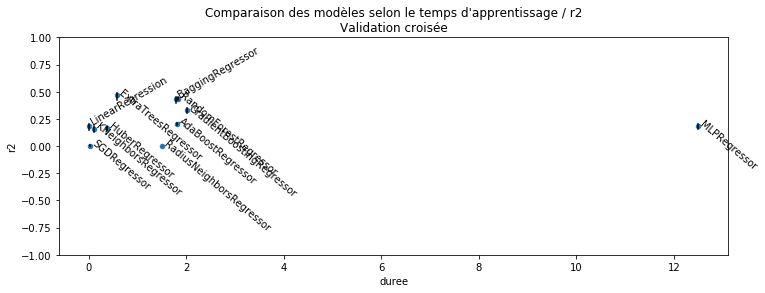

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
df[df['min'] > -0.1].plot(x='duree', y='r2', kind="scatter", ax=ax)
for row in df.itertuples():
    t, y, mi, ma, x = row[1:6]
    if mi < -0.1:
        continue
    ax.plot([x, x], [mi, ma], color="black")
    if t[0] in {'B', 'L'}:
        ax.text(x, y, t, rotation=30, ha='left', va='bottom')
    else:
        ax.text(x, y, t, rotation=-40)
ax.set_ylim([-1, 1])
ax.set_title("Comparaison des modèles selon le temps d'apprentissage / r2\nValidation croisée");